# Problem Statement

## Today as the competition among marketing companies, retail stores, banks to attract newer customers and maintain the old ones is in its peak, every company is trying to top the chart. An e-commerce retail store has been struggling with customer attrition wherein they want to analyze the rate at which they are losing out their customers and the rate at which they can acquire new customers by identifying different customer segments and take needful actions against them.

## Data Dictionary

### InvoiceNo : Unique Invoice number 

### StockCode : Unique Stock number 

### Decription : Despription of the product

### Quantity : Order Quantity

### InvoiceDate : Date of Purchase

### UnitPrice : Price of 1 unit product

### CustomerID : Unique Customer number

### Country : Country to ship into

## Libraries :

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split

## Load data :

In [2]:
df_data = pd.read_csv('retail_data.csv')

## Checking the data :

In [3]:
df_data.shape

(541909, 8)

In [4]:
df_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Data Cleaning :

## Checking for Missing Values :

In [7]:
df_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### CustomerID and Description contain null values and are not required to train the model so can be dropped as they cannot/need not be imputed

In [8]:
df_data = df_data.drop(['Description'],axis=1)
df_data = df_data.drop(['CustomerID'],axis=1)

In [9]:
df_data.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country'],
      dtype='object')

CustomerID and Description are removed!

In [10]:
df_data.isnull().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

Data set is now free of null values so no need to impute values

## Checking Duplicate values

In [11]:
df_data.count(axis=0)

InvoiceNo      541909
StockCode      541909
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
Country        541909
dtype: int64

In [12]:
df_data.nunique(axis=0)

InvoiceNo      25900
StockCode       4070
Quantity         722
InvoiceDate    23260
UnitPrice       1630
Country           38
dtype: int64

In [13]:
df_data[df_data.duplicated()]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country
517,536409,21866,1,12/1/2010 11:45,1.25,United Kingdom
527,536409,22866,1,12/1/2010 11:45,2.10,United Kingdom
537,536409,22900,1,12/1/2010 11:45,2.95,United Kingdom
539,536409,22111,1,12/1/2010 11:45,4.95,United Kingdom
555,536412,22327,1,12/1/2010 11:49,2.95,United Kingdom
...,...,...,...,...,...,...
541675,581538,22068,1,12/9/2011 11:34,0.39,United Kingdom
541689,581538,23318,1,12/9/2011 11:34,2.49,United Kingdom
541692,581538,22992,1,12/9/2011 11:34,1.95,United Kingdom
541699,581538,22694,1,12/9/2011 11:34,2.10,United Kingdom


In [14]:
df_data=df_data.drop_duplicates(keep=False)

In [15]:
df_data.drop(df_data[df_data["Quantity"]<0].index,inplace=True)


### Checking Numerical Columns

In [16]:
df_data.describe()

,Quantity,UnitPrice
count,521203.000000,521203.000000
mean,10.800891,3.885460
std,158.306316,42.210833
min,1.000000,-11062.060000
25%,1.000000,1.250000
50%,4.000000,2.080000
75%,12.000000,4.130000
max,80995.000000,13541.330000


### Checking for outliers

<AxesSubplot:xlabel='UnitPrice', ylabel='Quantity'>

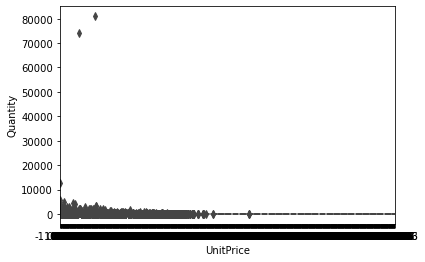

In [17]:
sns.boxplot(x="UnitPrice",y="Quantity",data=df_data)

We can see that there are negative values which is not possible so they have to be converted to positive using abs function

In [18]:
df_data['UnitPrice']=df_data['UnitPrice'].abs()
df_data['Quantity']=df_data['Quantity'].abs()

<AxesSubplot:xlabel='UnitPrice', ylabel='Quantity'>

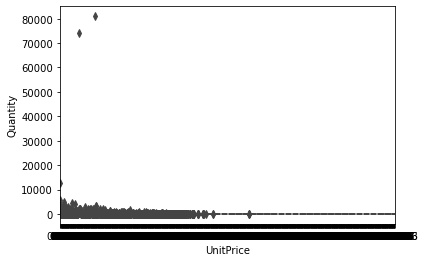

In [19]:
sns.boxplot(x="UnitPrice",y="Quantity",data=df_data)

In [20]:
df_data['Quantity_log']=np.log(df_data['Quantity'])

<AxesSubplot:xlabel='UnitPrice', ylabel='Quantity_log'>

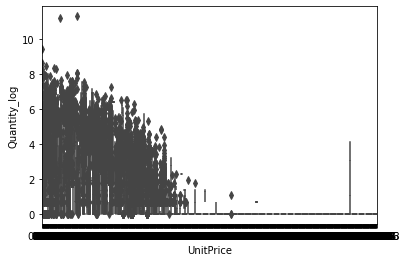

In [21]:
sns.boxplot(x="UnitPrice",y="Quantity_log",data=df_data)

## Features:

#### Categorical : Country

#### Numerical : Quantity,UnitPrice

#### Adding Amount as a numerical feature

<AxesSubplot:title={'center':'Country'}>

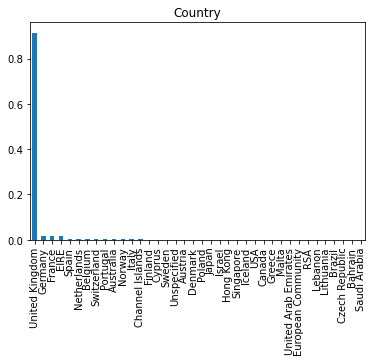

In [22]:
df_data['Country'].value_counts(normalize=True).plot.bar(title='Country')

In [23]:
df_data["Country"] = df_data["Country"].astype('category')

Maximum number of customers are from United Kingdom so for further analysis we can rule out UK to find attrition.

<AxesSubplot:xlabel='Country'>

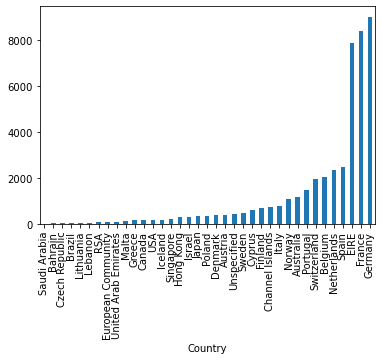

In [24]:
country_group = df_data.groupby('Country')['InvoiceNo'].count().sort_values()
del country_group['United Kingdom']
country_group.plot.bar()

After UK, maximum number of orders come from Germany,France and EIRE.

<AxesSubplot:xlabel='Country'>

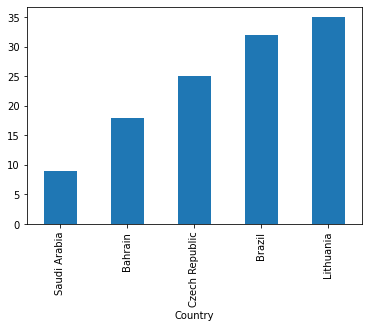

In [25]:
df_data['Amount']=df_data['Quantity'] * df_data['UnitPrice']
country_group = df_data.groupby('Country')['Amount'].count().sort_values()
del country_group['United Kingdom']
country_group.head(5).plot.bar()

These are the bottom 5 countries with least revenue

## We need time format for time related analysis

In [29]:
from datetime import datetime
time_data=df_data['InvoiceDate']
format_data = "%m/%d/%Y %H:%M"
new_date=[]
for i in time_data:
    new_date.append(datetime.strptime(i, format_data))
df_data['InvoiceDate']=new_date

TypeError: strptime() argument 1 must be str, not Timestamp

In [30]:
import datetime as dt
df_data.insert(loc=2, column='Year', value=df_data.InvoiceDate.dt.year)
df_data.insert(loc=3, column='Month', value=df_data.InvoiceDate.dt.month)
df_data.insert(loc=4, column='Day', value=(df_data.InvoiceDate.dt.dayofweek)+1)
df_data.insert(loc=5, column='Hour', value=df_data.InvoiceDate.dt.hour)

In [31]:
df_data.head()

,InvoiceNo,StockCode,Year,Month,Day,Hour,Quantity,InvoiceDate,UnitPrice,Country,Quantity_log,Amount
0,536365,85123A,2010,12,3,8,6,2010-12-01 08:26:00,2.55,United Kingdom,1.791759,15.30
1,536365,71053,2010,12,3,8,6,2010-12-01 08:26:00,3.39,United Kingdom,1.791759,20.34
2,536365,84406B,2010,12,3,8,8,2010-12-01 08:26:00,2.75,United Kingdom,2.079442,22.00
3,536365,84029G,2010,12,3,8,6,2010-12-01 08:26:00,3.39,United Kingdom,1.791759,20.34
4,536365,84029E,2010,12,3,8,6,2010-12-01 08:26:00,3.39,United Kingdom,1.791759,20.34


In [32]:
df_data.head()

,InvoiceNo,StockCode,Year,Month,Day,Hour,Quantity,InvoiceDate,UnitPrice,Country,Quantity_log,Amount
0,536365,85123A,2010,12,3,8,6,2010-12-01 08:26:00,2.55,United Kingdom,1.791759,15.30
1,536365,71053,2010,12,3,8,6,2010-12-01 08:26:00,3.39,United Kingdom,1.791759,20.34
2,536365,84406B,2010,12,3,8,8,2010-12-01 08:26:00,2.75,United Kingdom,2.079442,22.00
3,536365,84029G,2010,12,3,8,6,2010-12-01 08:26:00,3.39,United Kingdom,1.791759,20.34
4,536365,84029E,2010,12,3,8,6,2010-12-01 08:26:00,3.39,United Kingdom,1.791759,20.34


### Month wise sales

<AxesSubplot:>

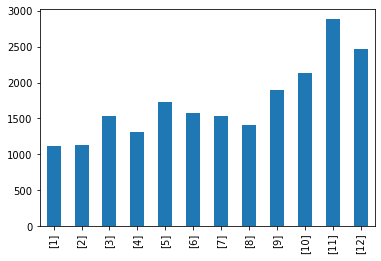

In [37]:
ax=df_data.groupby('InvoiceNo')['Month'].unique().value_counts().sort_index()
ax.plot.bar()

Most orders take place in November

### Day wise sales (Weekly)

<AxesSubplot:>

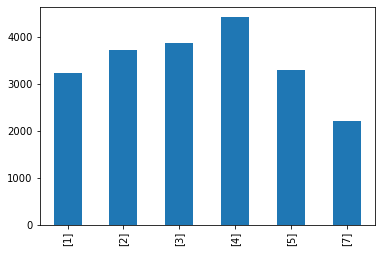

In [38]:
ax=df_data.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index()
ax.plot.bar()

Most orders take place on thursday